Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [12]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/drive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [31]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/My Drive/Melanoma/Train")
data_dir_test = pathlib.Path('/content/drive/My Drive/Melanoma/Test')

In [32]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [33]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [34]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [35]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [36]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

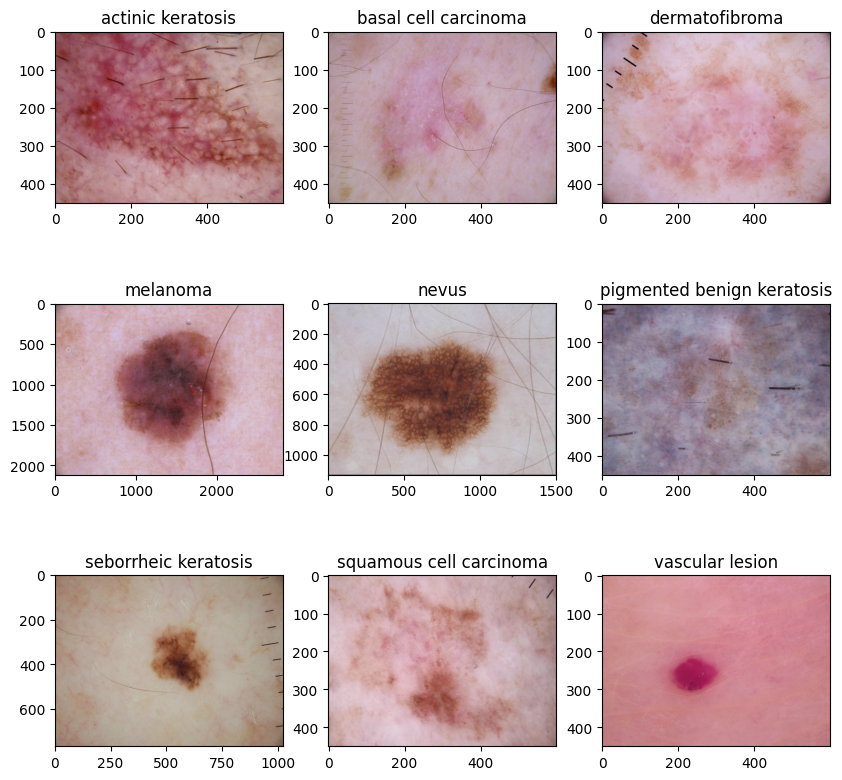

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [37]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [38]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 180, 180, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 90, 90, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 45, 45, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 22, 22, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 9)                   │          69,705 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 277,129 (1.06 MB)

 Trainable params: 277,129 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 96s 1s/step - loss: 2.0678 - accuracy: 0.1791 - val_loss: 2.0474 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 65s 1s/step - loss: 1.9745 - accuracy: 0.2467 - val_loss: 1.8871 - val_accuracy: 0.3043
Epoch 3/20
56/56 [==============================] - 65s 1s/step - loss: 1.9265 - accuracy: 0.2807 - val_loss: 1.8239 - val_accuracy: 0.3289
Epoch 4/20
56/56 [==============================] - 65s 1s/step - loss: 1.8094 - accuracy: 0.3348 - val_loss: 1.8838 - val_accuracy: 0.2819
Epoch 5/20
56/56 [==============================] - 65s 1s/step - loss: 1.8123 - accuracy: 0.3376 - val_loss: 1.7687 - val_accuracy: 0.3378
Epoch 6/20
56/56 [==============================] - 64s 1s/step - loss: 1.7045 - accuracy: 0.3499 - val_loss: 1.6562 - val_accuracy: 0.4094
Epoch 7/20
56/56 [==============================] - 65s 1s/step - loss: 1.6391 - accuracy: 0.4057 - val_loss: 1.6927 - val_accuracy: 0.4116
Epoch 8/20
56/56 [=============

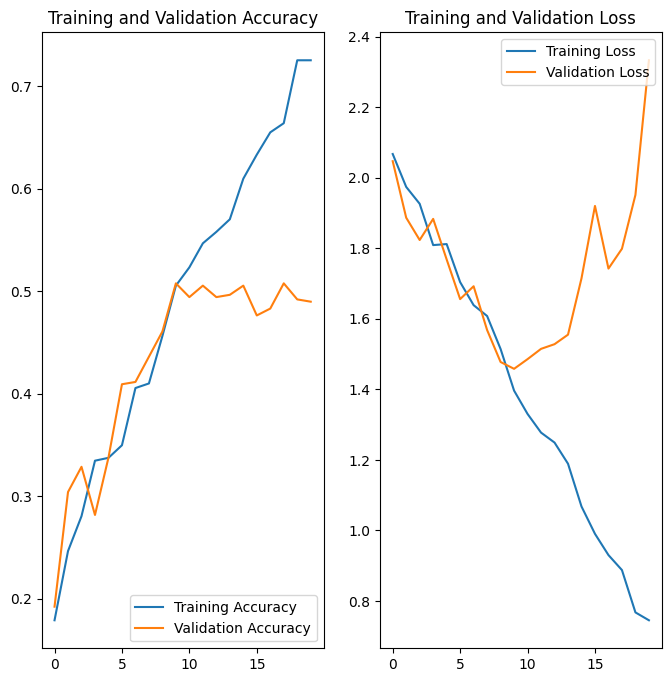

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Visualizing training results

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

## Finding on the first base model

The model is overfitting because we can also see difference in loss functions in training & test around the 12-13th epoch.
accuracy: 0.7254 ,val_accuracy: 0.4899.

The accuracy is just around 72-80% because there are enough features to remember the pattern.



In [39]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
data_augument = keras.Sequential([
                             layers.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.RandomRotation(0.2, fill_mode='reflect'),
                             layers.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])


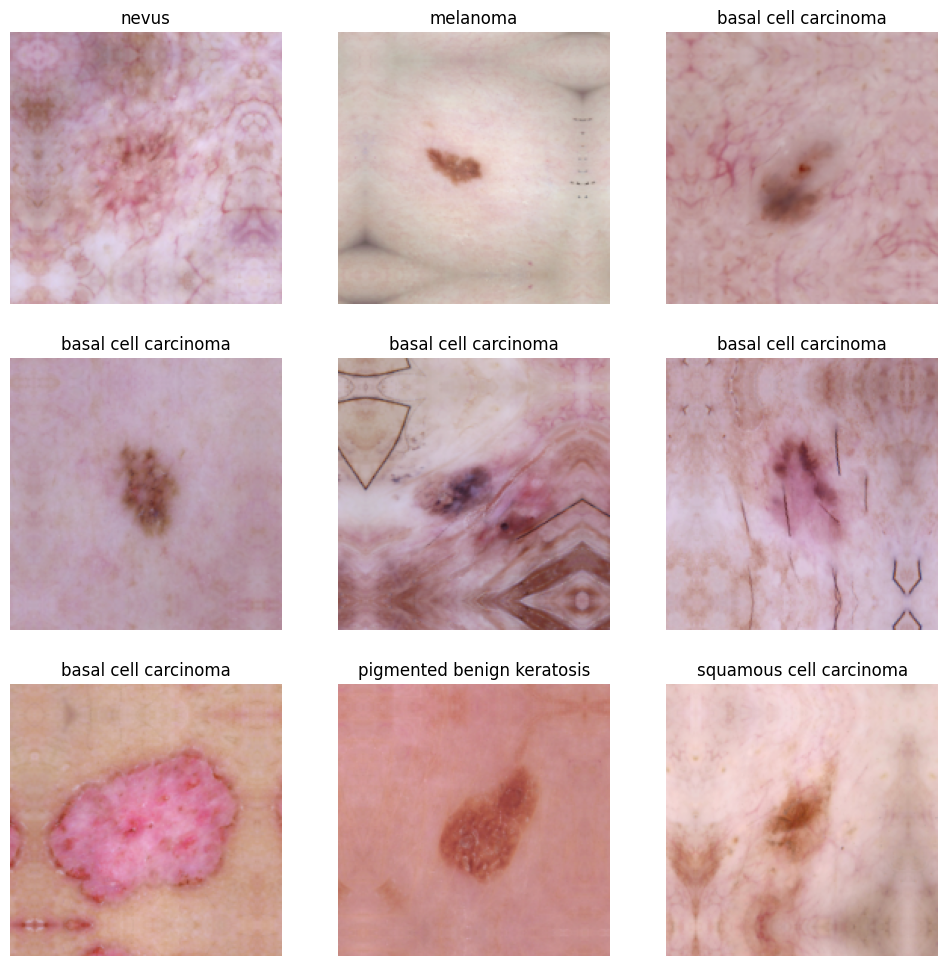

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [40]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))



### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 72s 1s/step - loss: 2.0592 - accuracy: 0.2015 - val_loss: 2.1011 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 70s 1s/step - loss: 1.9910 - accuracy: 0.2377 - val_loss: 1.9329 - val_accuracy: 0.2349
Epoch 3/20
56/56 [==============================] - 70s 1s/step - loss: 1.9980 - accuracy: 0.2388 - val_loss: 2.0401 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 70s 1s/step - loss: 2.0238 - accuracy: 0.2076 - val_loss: 2.0505 - val_accuracy: 0.2081
Epoch 5/20
56/56 [==============================] - 70s 1s/step - loss: 2.0184 - accuracy: 0.1975 - val_loss: 2.0410 - val_accuracy: 0.2081
Epoch 6/20
56/56 [==============================] - 70s 1s/step - loss: 2.0021 - accuracy: 0.2165 - val_loss: 2.0184 - val_accuracy: 0.2260
Epoch 7/20
56/56 [==============================] - 70s 1s/step - loss: 1.9543 - accuracy: 0.2394 - val_loss: 1.8843 - val_accuracy: 0.2729
Epoch 8/20
56/56 [==

### Visualizing the results

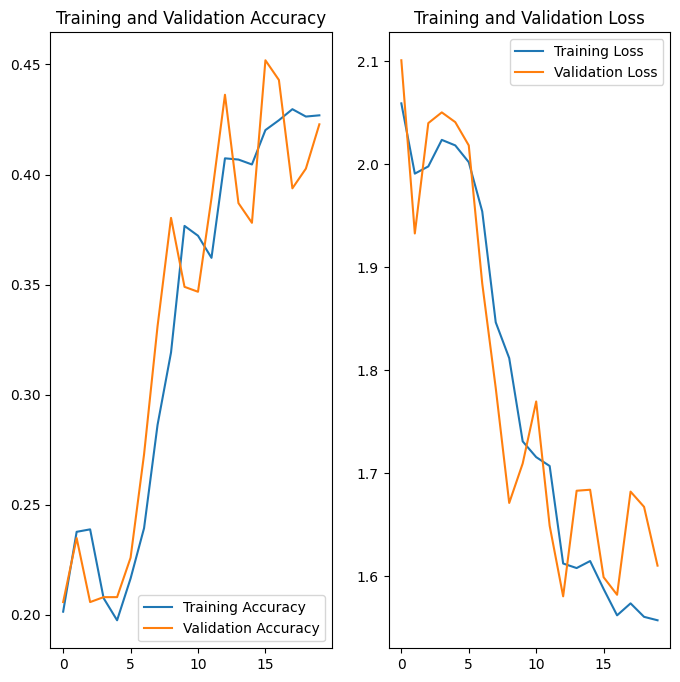

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Finding from Second Model

Training accuracy: 0.4269 , val_accuracy: 0.4228.
There is no improvement in accuracy but we can definitely see the overfitting problem has solved due to data augmentation


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [41]:
data_dir_train = pathlib.Path("/content/drive/My Drive/Melanoma/Train/")
path_list=[]
lesion_list=[]
for i in class_names:

    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/My Drive/Melanoma/Train/actinic...,actinic keratosis
1,/content/drive/My Drive/Melanoma/Train/actinic...,actinic keratosis
2,/content/drive/My Drive/Melanoma/Train/actinic...,actinic keratosis
3,/content/drive/My Drive/Melanoma/Train/actinic...,actinic keratosis
4,/content/drive/My Drive/Melanoma/Train/actinic...,actinic keratosis
...,...,...
2234,/content/drive/My Drive/Melanoma/Train/vascula...,vascular lesion
2235,/content/drive/My Drive/Melanoma/Train/vascula...,vascular lesion
2236,/content/drive/My Drive/Melanoma/Train/vascula...,vascular lesion
2237,/content/drive/My Drive/Melanoma/Train/vascula...,vascular lesion


In [42]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/My Drive/Melanoma/Train/actinic...,actinic keratosis
1,/content/drive/My Drive/Melanoma/Train/actinic...,actinic keratosis
2,/content/drive/My Drive/Melanoma/Train/actinic...,actinic keratosis
3,/content/drive/My Drive/Melanoma/Train/actinic...,actinic keratosis
4,/content/drive/My Drive/Melanoma/Train/actinic...,actinic keratosis
...,...,...
2234,/content/drive/My Drive/Melanoma/Train/vascula...,vascular lesion
2235,/content/drive/My Drive/Melanoma/Train/vascula...,vascular lesion
2236,/content/drive/My Drive/Melanoma/Train/vascula...,vascular lesion
2237,/content/drive/My Drive/Melanoma/Train/vascula...,vascular lesion


<BarContainer object of 9 artists>

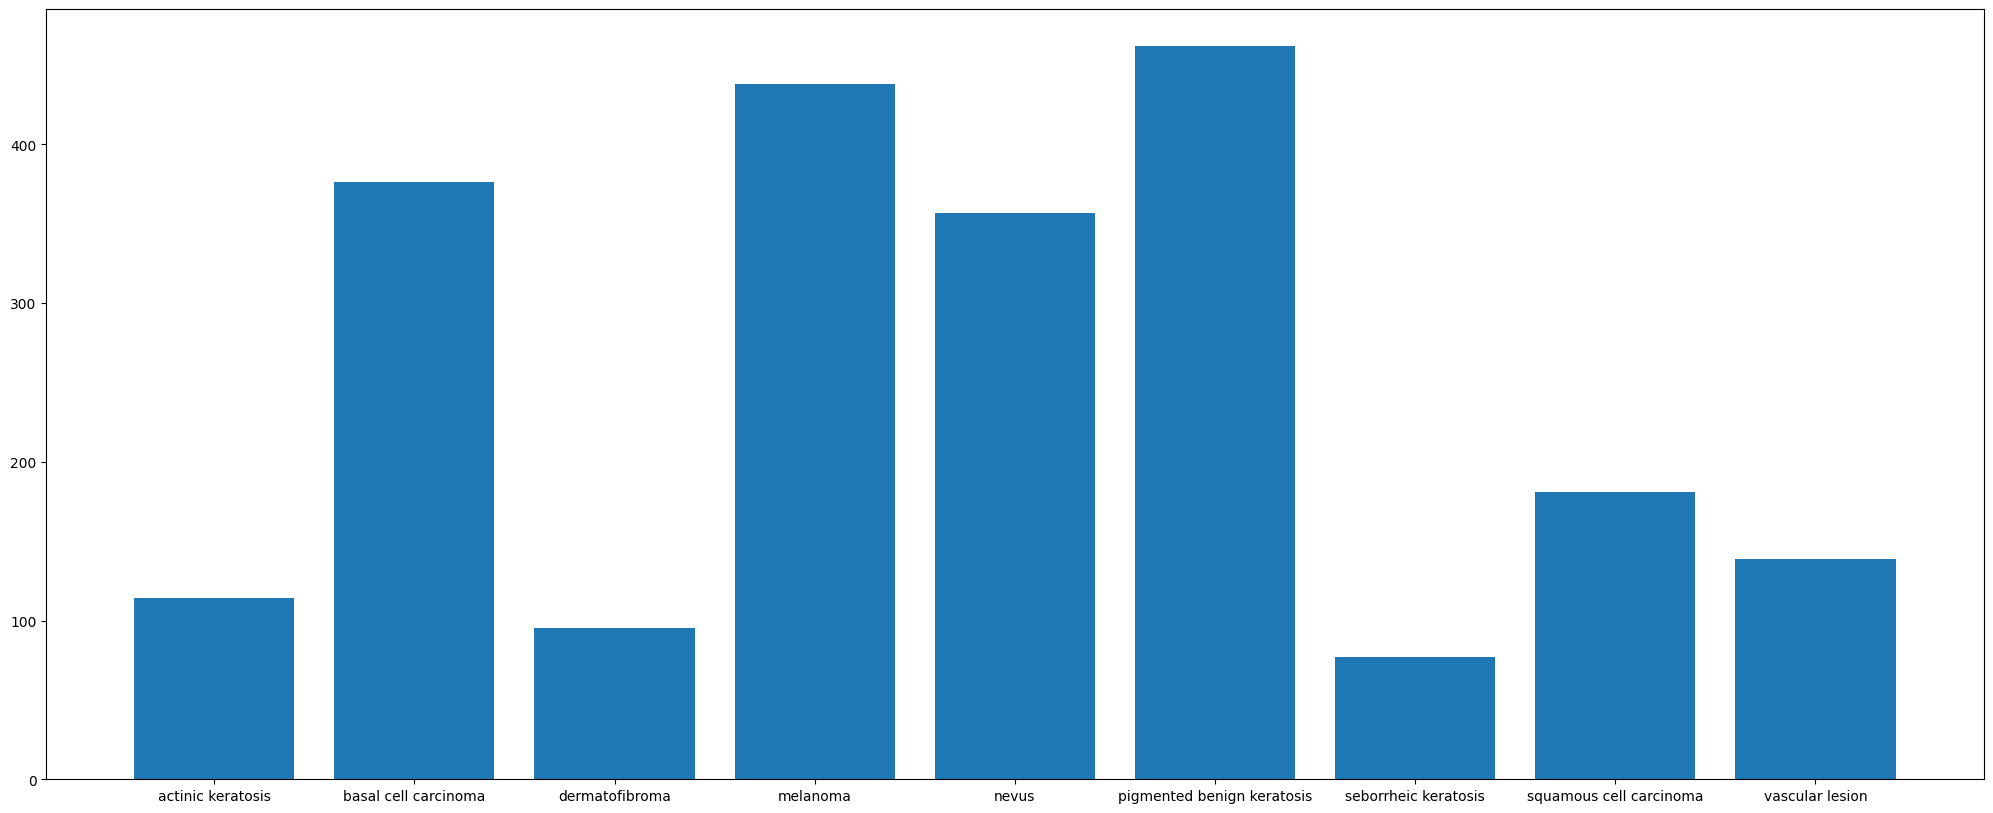

In [ ]:
## Your code goes here.
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?

Answer-1 :- seborrheic keratosis has least number of samples

Answer-2:- actinic keratosis and dermatofibroma have proportionate number of classes.
melanoma and pigmented benign keratosis have proprtionate number of classes

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [25]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [43]:
path_to_training_dataset="/content/drive/My Drive/Melanoma/Train"

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset,save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

 ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F22C80B72E0>: 100%|██████████| 500/500 [00:46<00:00, 10.71 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F22C8014820>: 100%|██████████| 500/500 [00:44<00:00, 11.15 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F22C8103D30>: 100%|██████████| 500/500 [00:49<00:00, 10.15 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F22C80D7EE0>: 100%|██████████| 500/500 [00:39<00:00, 12.82 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F22BE62F5B0>: 100%|██████████| 500/500 [00:47<00:00, 10.43 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F22C8339840>: 100%|██████████| 500/500 [00:53<00:00,  9.30 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F234676E5C0>: 100%|██████████| 500/500 [00:47<00:00, 10.43 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F23481A5DE0>: 100%|██████████| 500/500 [00:41<00:00, 12.15 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F234672E170>: 100%|██████████| 500/500 [00:45<00:00, 11.00 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [44]:
data_dir_train = pathlib.Path("/content/drive/My Drive/Melanoma/Train/output")
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [45]:
for i in class_names:

    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/drive/My Drive/Melanoma/Train/actinic...,actinic keratosis
1,/content/drive/My Drive/Melanoma/Train/actinic...,actinic keratosis
2,/content/drive/My Drive/Melanoma/Train/actinic...,actinic keratosis
3,/content/drive/My Drive/Melanoma/Train/actinic...,actinic keratosis
4,/content/drive/My Drive/Melanoma/Train/actinic...,actinic keratosis
...,...,...
6734,/content/drive/My Drive/Melanoma/Train/output/...,vascular lesion
6735,/content/drive/My Drive/Melanoma/Train/output/...,vascular lesion
6736,/content/drive/My Drive/Melanoma/Train/output/...,vascular lesion
6737,/content/drive/My Drive/Melanoma/Train/output/...,vascular lesion


In [46]:
new_df['Label'].value_counts()

,count
Label,
pigmented benign keratosis,1387
melanoma,1351
basal cell carcinoma,1145
nevus,1092
squamous cell carcinoma,504
vascular lesion,399
actinic keratosis,345
dermatofibroma,274
seborrheic keratosis,242


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [47]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [50]:
data_dir_train=pathlib.Path("/content/drive/My Drive/Melanoma/Train/output")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


#### **Todo:** Create a validation dataset

In [51]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [52]:
## your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [53]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [54]:
epochs =50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


113/113 ━━━━━━━━━━━━━━━━━━━━ 54s 335ms/step - accuracy: 0.2350 - loss: 1.9997 - val_accuracy: 0.2967 - val_loss: 1.8415
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 25s 221ms/step - accuracy: 0.3319 - loss: 1.8248 - val_accuracy: 0.2389 - val_loss: 2.0789
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 42s 230ms/step - accuracy: 0.3693 - loss: 1.7240 - val_accuracy: 0.4667 - val_loss: 1.4897
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 41s 233ms/step - accuracy: 0.4572 - loss: 1.4793 - val_accuracy: 0.5033 - val_loss: 1.4368
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 40s 221ms/step - accuracy: 0.5201 - loss: 1.3263 - val_accuracy: 0.5189 - val_loss: 1.3377
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 41s 222ms/step - accuracy: 0.5935 - loss: 1.1863 - val_accuracy: 0.5067 - val_loss: 1.4204
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 42s 229ms/step - accuracy: 0.6430 - loss: 1.0383 - val_accuracy: 0.5578 - val_loss: 1.3524
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 41s 230ms/step - accuracy: 0.6758 - loss: 0.9377 - val

#### **Todo:**  Visualize the model results

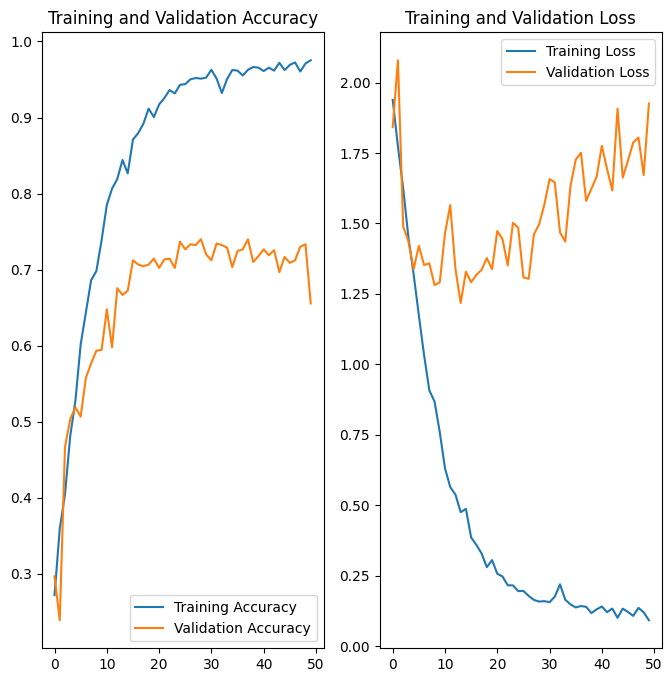

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [ ]:
Accuracy on training data has increased by using Augmentor library.
training accuracy: 0.9770  val_accuracy: 0.6556

Model is still overfitting

The Model can be further improved by tuning the hyperparameter